In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

%matplotlib inline

In [72]:
folder_names = [r"/home/justin/Documents/rlkit/output/sawyer-reach-sim-2d/2019_05_11_21_40_04",
r"/home/justin/Documents/rlkit/output/sawyer-reach-sim-2d/2019_05_11_21_40_26"           
               ]





In [78]:
def process_data(fname):
    file_name = fname + "/progress.csv"
    data = pd.read_csv(file_name)
    print(data.columns)
    
    json_dict = json.load(open(fname + "/variant.json"))
    n_tasks = json_dict["env_params"]["n_tasks"]
    kl_lambda = json_dict["algo_params"]["kl_lambda"]
    label = "NTasks: {} | KL-Lambda: {}".format(n_tasks, kl_lambda)
    
    data["info"] = label
    return data
    
def plot(data, column_name):
    x = data[[column_name, "info"]]
    plt.figure(figsize=(12,8))
    sns.lineplot(x = x.index, y = x[column_name], hue=x["info"])

In [79]:
all_data = []
for fname in folder_names:
    all_data.append(process_data(fname))

Index(['V Predictions Max', 'Policy mu Mean', 'TestIndices',
       'Stddev_AverageReturn_all_train_tasks', 'V Predictions Min',
       'Number of train steps total', 'Q Predictions Std', 'Z mean train',
       'Stddev_AverageReturn_all_test_tasks', 'Number of env steps total',
       'VF Loss', 'AverageFinalReturn_all_test_tasks', 'TrainIndices',
       'Policy log std Std', 'Policy log std Min', 'Z mean eval',
       'Log Pis Mean', 'AverageFinalReturn_all_train_tasks', 'Epoch Time (s)',
       'Policy mu Min', 'Q Predictions Max', 'AverageReturn_all_train_tasks',
       'Policy mu Max', 'QF Loss', 'Policy log std Mean',
       'Stddev_AverageFinalReturn_all_train_tasks', 'KL Loss',
       'Total Train Time (s)', 'TestFinalReturns', 'Train Time (s)',
       'Q Predictions Mean', 'AverageReturn_all_test_tasks', 'Log Pis Std',
       'Policy log std Max', 'V Predictions Mean',
       'Stddev_AverageFinalReturn_all_test_tasks', 'Policy mu Std',
       'Log Pis Max', 'TrainFinalReturns',

/home/justin/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


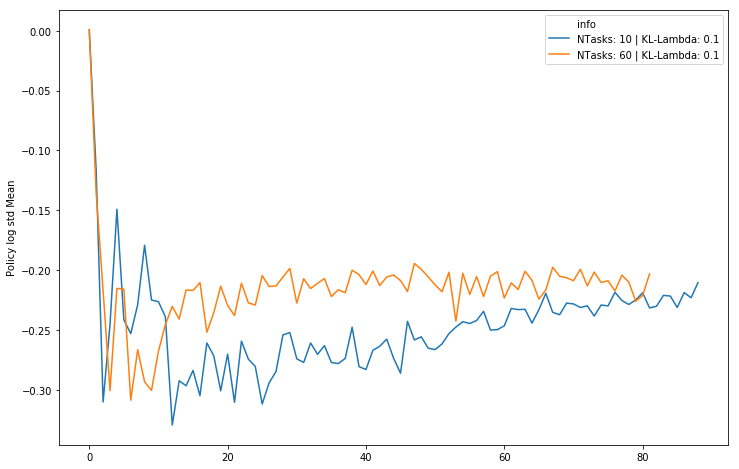

In [80]:
plot(pd.concat(all_data), "Policy log std Mean")

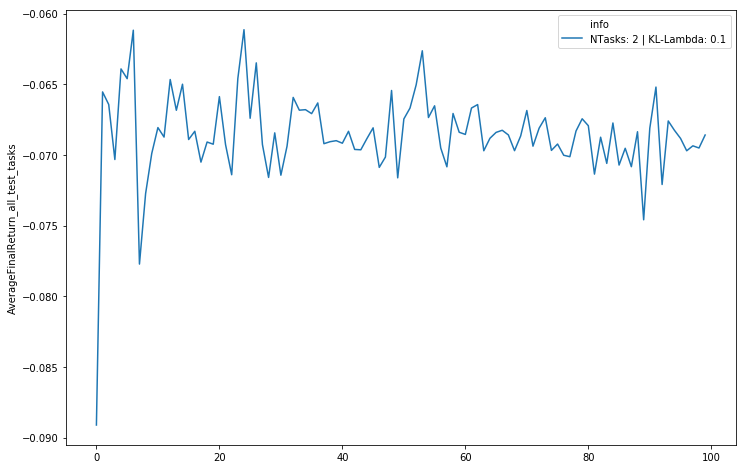

In [71]:
plot(pd.concat(all_data), "AverageFinalReturn_all_test_tasks")